In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
%run build.py
%run read_and_plot.py
%run run_algos.py

In [6]:
# read data

gtL1 = genfromtxt('data/groundtruth/alluregtL1_full.csv', delimiter=',')
gtL2 = genfromtxt('data/groundtruth/alluregtL2_full.csv', delimiter=',')
test = genfromtxt('data/vectors/allure_full.csv', delimiter=',').astype('float32')
query = genfromtxt('data/vectors/allure_full.csv', delimiter=',').astype('float32')
durs = genfromtxt('data/groundtruth/alluregtdurs_full.csv', delimiter=',')

In [9]:
# make benchmark

def makeBench(test, query, metric, path):
    assert metric == 'L1' or metric == 'L2'
    if metric == 'L1':
        gt = gtL1
        control_dur = durs[1][0]
        control_bt = durs[1][1]
    if metric == 'L2':
        gt = gtL2
        control_dur = durs[0][0]
        control_bt = durs[0][1]
    benchmarks = {}
    benchmarks = runHNSW(test, query, gt, metric, benchmarks)
    benchmarks = runIVF(test, query, gt, metric, benchmarks)
    benchmarks = runIVFPQ(test, query, gt, metric, benchmarks)
    benchmarks = runLSH(test, query, gt, benchmarks)
    benchmarks = runPQ(test, query, gt, benchmarks)
    benchmarks['Flat'] = [control_dur, 1, control_bt, 0]
    binary_dur, binary_recall, binary_bt = runBinary(test, query, gt)
    benchmarks['Binary'] = [1/binary_dur, binary_recall, binary_bt, 0]
    save(benchmarks, path)
    print('File saved to ' + path)

makeBench(test, query, 'L2', 'benchmarks/allureL2_full.csv')

File saved to benchmarks/allureL2_full.csv


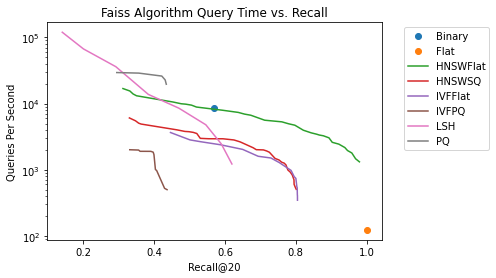

In [2]:
benchmarks = read('benchmarks/allureL1_full.csv')
plotQPS(benchmarks, 'plots/allureL1_full.png')

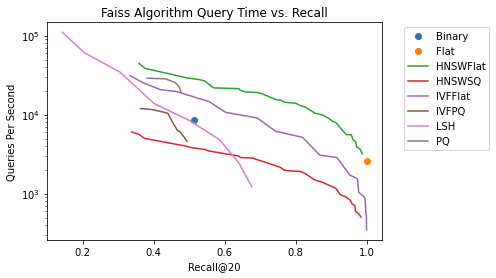

In [3]:
benchmarks2 = read('benchmarks/allureL2_full.csv')
plotQPS(benchmarks2, 'plots/allureL2_full.png')

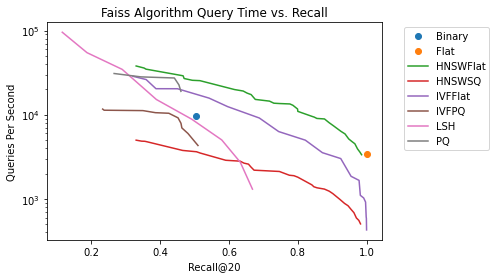

In [4]:
benchmarks3 = read('benchmarks/allureL2.csv')
plotQPS(benchmarks3, 'plots/allureL2.png')

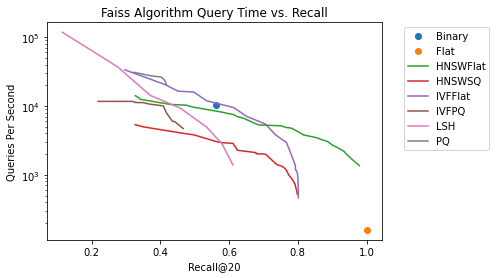

In [5]:
benchmarks4 = read('benchmarks/allureL1.csv')
plotQPS(benchmarks4, 'plots/allureL1.png')